In [ ]:
# AR    I   MA
#  p    d    q
# pacf  d   acf

# d=no of times differencig
# p and q is calculated from pacf and acf plot


# AutoRegression - Partial Auto Correlation -> AR
# Moving  Avg- Auto Correlation Plots       -> MA   
# Integraded - Differencing                 ->  I 

In [ ]:
'''
ARIMA OR SARIMAX (Stationary Data)
    -> checks the data for stationary data
    
    Dickey Fuller Test (DFT)
        for checking data is stationary we do hypothesis testing name dickey fuller test.
        -> IN null Hypothesis H0 => Unit Root 1 => Data isn't stationary
        -> In Alte Hypothesis H1 => Unit Root 2 => Data is stationary
        
        For Stationary Data -> Mean should be constant
                            -> Standard deviation should be constant
                            
    In order to check the data is stationary or not we apply dickey fuller test
        DFT internally gives two values 1. Dickey Fuller Statistics
        (internally it gives p value    
         and if p<0.05 then null 
         hypothesis gets rejected
         if p>=0.05, null hypothesis 
         will be accepted i.e Data is
         not stationary)
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

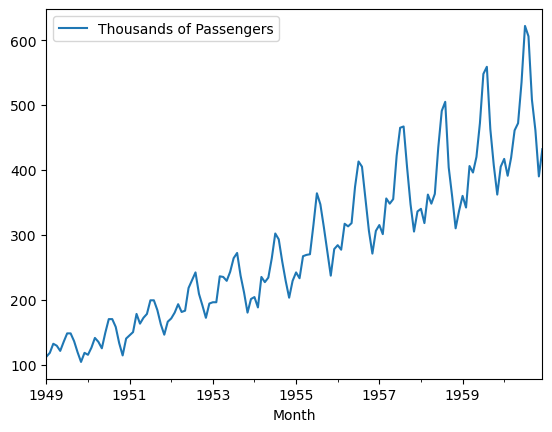

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing to make it stationary
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing (second differrencing) to make it stationary
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

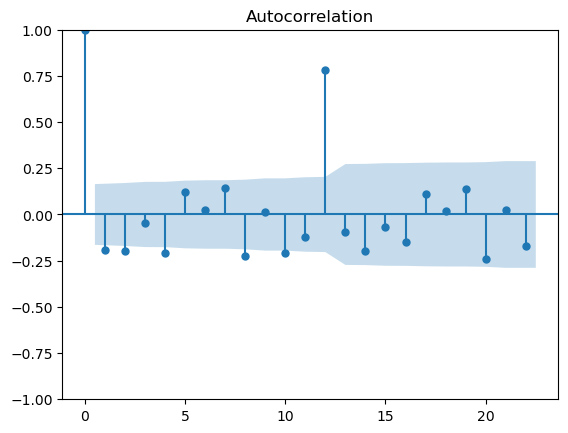

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [ ]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [ ]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
### split train and test data
df_airline

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [ ]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train_data

In [ ]:
import statsmodels.api as sm
model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'], order=(0,2,0))

In [ ]:

# model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

In [ ]:
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

In [ ]:
test_data

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [ ]:
pred

In [ ]:
residuals

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

In [ ]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [ ]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
model_SARIMA_fit.summary()

In [ ]:
test_data.tail()

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

In [ ]:
model_SARIMA_fit.resid.plot()

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima

In [ ]:
test_data

In [ ]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()